In [8]:
import numpy as np

# Load the CSV file, skip the header
data = np.genfromtxt('breast-cancer.csv', delimiter=',', dtype=str, encoding='utf-8', skip_header=1)

# Convert 'diagnosis' column (column 1): 'M' -> 0 (malignant), 'B' -> 1 (benign)
y = np.array([0 if row[1] == 'M' else 1 for row in data])

# Convert feature columns (columns 2 to end) to float32
X = np.array([list(map(float, row[2:])) for row in data], dtype=np.float32)

# Print shape of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)



X shape: (569, 30)
y shape: (569,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


Linear SVM Accuracy: 0.956140350877193
RBF SVM Accuracy: 0.9736842105263158


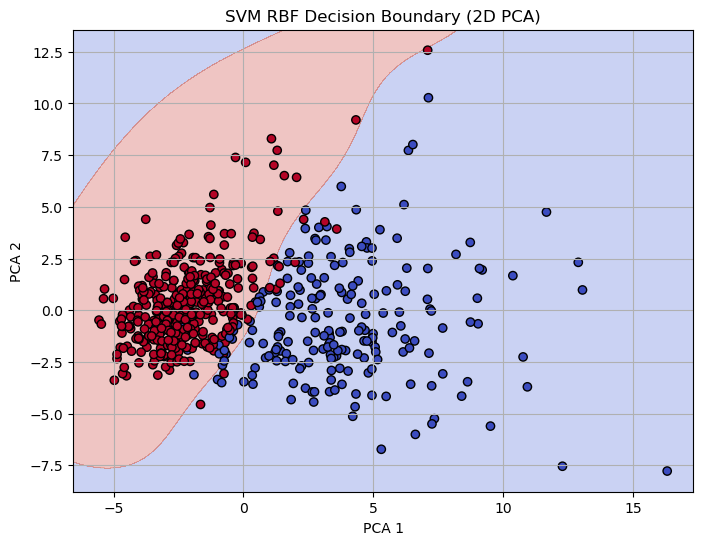

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Retrain SVM on 2D data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_rbf_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_pca.fit(X_train_pca, y_train_pca)

# Plot function
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

plot_decision_boundary(svm_rbf_pca, X_pca, y, "SVM RBF Decision Boundary (2D PCA)")


In [12]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Grid search
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Final Accuracy: 0.9736842105263158


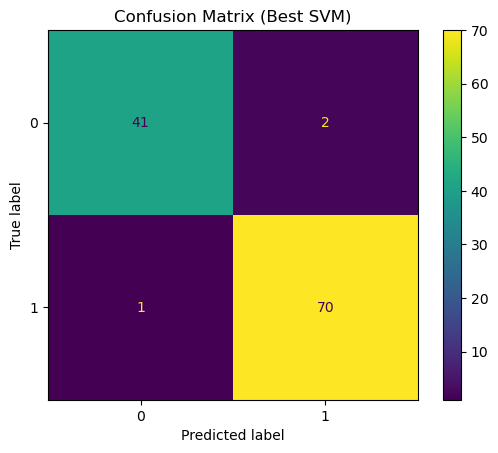

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Predict using best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix (Best SVM)")
plt.show()
